# SAT Score
Here are the notes about chapter 12

In [43]:
import thinkbayes2
import thinkplot

import math
import numpy as np

import sys
sys.path.append('/Users/francesco/PersonalProjects/ThinkBayes2/')
from scripts import sat

Alice and Bob got 780 and 740 (out of 800) respectively in a math test, and we want to know "whether that difference is evidence that Alice is better prepared than Bob, and what the strength of that evidence is."

## The score
Each person taking a test gets a raw score based on the number of correct and incorrect questions. the raw score is then converted to a scaled score in the range 200-800.

The raw score is obtained as the number of correct answers with a penalty of 1/4 for each incorrect answer. There are 54 questions.

Data on previous rounds of the tests are available.

## Scenario 1
In this scenario a simplification is used: all the questions are equally difficult. If this assumption is made, one can define `p_correct` as the probability *for a person taking the test* to answer any of the questions correctly.

### Prior
Since we want to estimate `p_correct` given the test score, we need a prior on `p_correct`. It can be obtained from the available data. The data contain the distribution of the scaled scores for all the test-takers. So, in order to obtain the prior we have to:  
1) get the distribution of the scaled test scores  
2) convert each scaled test score to a raw score  
3) divide by the number of questions (as `p_correct` is the probability "per question")

`sat.ReadScale(...)` reads the file with raw and scaled scores and implements a mapping.

In [29]:
mapping = sat.ReadScale('/Users/francesco/PersonalProjects/ThinkBayes2/data/sat_scale.csv')

In [30]:
## convert raw score to scaled score
mapping.Lookup(10)

370.0

In [31]:
## convert scaled score to raw score
mapping.Reverse(740)

51.0

`sat.ReadRanks(..)` reads the distribution of the scores from the provided files

In [17]:
obj = sat.ReadRanks('/Users/francesco/PersonalProjects/ThinkBayes2/data/sat_ranks.csv')

`obj` is a list of (score, frequencies)

In [25]:
pmf = thinkbayes2.Pmf(dict(obj), label='Scaled scores')

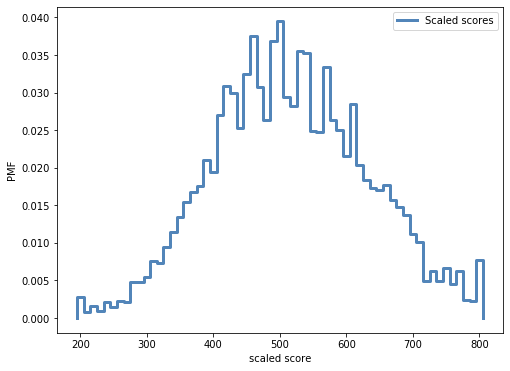

In [26]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='scaled score',
                ylabel='PMF')

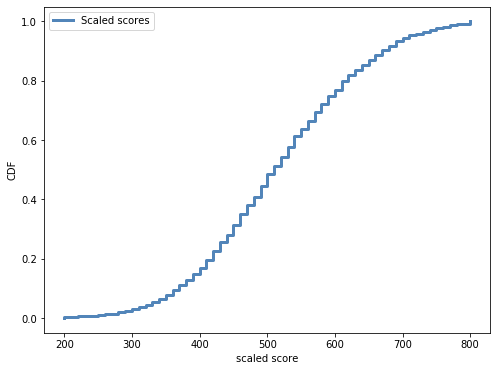

In [27]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)
thinkplot.Cdf(pmf.MakeCdf())
thinkplot.Config(xlabel='scaled score',
                ylabel='CDF')

Let's get the distribution of the raw scores:

In [32]:
pmf_r = thinkbayes2.Pmf(label='raw')

for scaled, prob in pmf.Items():
    
    raw = mapping.Reverse(scaled)
    
    pmf_r.Incr(raw, prob)

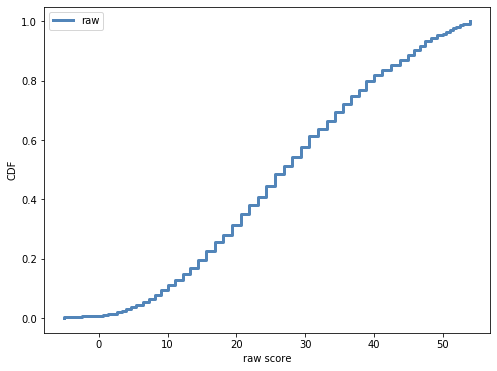

In [34]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)
thinkplot.Cdf(pmf_r.MakeCdf())
thinkplot.Config(xlabel='raw score',
                ylabel='CDF')

In [49]:
max_score = max( pmf_r.Values() )
print('max raw score:', max_score)

max raw score: 54


Let's get the prior on `p_correct`

In [51]:
pmf_p = thinkbayes2.Pmf()

for raw, prob in pmf_r.Items():
    
    pmf_p.Incr( raw/max_score, prob)

No handles with labels found to put in legend.


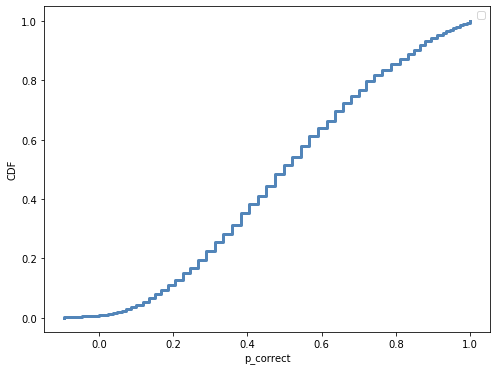

In [54]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)
thinkplot.Cdf(pmf_p.MakeCdf())
thinkplot.Config(xlabel='p_correct',
                ylabel='CDF')